In [1]:
import tadasets, ripser, persim
import matplotlib.pyplot as plt
import numpy as np
import greedy_sketch as gs

(2000, 3)


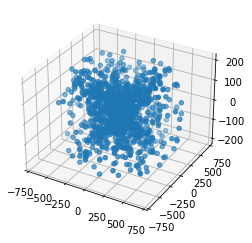

In [2]:
c = [11,25,50,75,100,200,250,300,400,500]
a = [5,10,25,50,75,100,125,150,175,200]

points = np.empty((0,3))
for i in range(10):
    points = np.append(points, tadasets.torus(n=200, c=c[i], a=a[i]), axis=0)

print(points.shape)
fig = plt.figure()
ax= plt.axes(projection='3d')
ax.scatter(points.T[0], points.T[1], points.T[2])

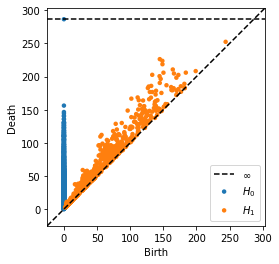

In [3]:
rips= ripser.ripser(points)
persim.plot_diagrams(rips['dgms'], show=True)

In [4]:
dgm = [[229.7297821, 245.43217468], [221.8276825, 241.50553894], [197.47032166, 198.62571716], [  2.26492929, 2.43465281], [  2.12078094, 2.37112904], [  1.99872363, 2.16104507]]

In [5]:
#perm, dist = gs.naive_greedy_perm(rips['dgms'][1], n=len(rips['dgms'][1]))
crap = gs.naive_greedy_sketch(rips['dgms'][1], n =15, minimal = False)
#crap = gs.naive_greedy_sketch(dgm, n =5, minimal = False)
sketches = crap['sketches']
perm = crap['perm']
dist = crap['dist']
transport_plans = crap['transport_plans']

In [6]:
from matplotlib import animation
from IPython.display import HTML

fig = plt.figure()
persim.plot_diagrams(np.zeros((1, 2)), xy_range=[0, 300, 0, 300], show=False)
graph = plt.scatter([point[0] for point in rips["dgms"][1]], [point[1] for point in rips["dgms"][1]])
plt.close()

def animate(frame):
    pts = np.concatenate((rips["dgms"][1], sketches[frame]), axis=0)
    graph.set_offsets(np.vstack(([point[0] for point in pts], [point[1] for point in pts])).T)
    graph.set_facecolors(["lightgrey" for i in range(len(rips["dgms"][1]))] + ["blue" for i in range(len(sketches[frame]))])

anim = animation.FuncAnimation(fig, animate, frames=15, interval=500)

HTML(anim.to_jshtml())

In [7]:
print(transport_plans)

[defaultdict(<class 'int'>, {(0.0, 0.0): -7, (144.7281036376953, 226.36131286621094): 7}), defaultdict(<class 'int'>, {(0.0, 0.0): -10, (101.78679656982422, 166.71461486816406): 10}), defaultdict(<class 'int'>, {(0.0, 0.0): -15, (56.82298278808594, 111.9783935546875): 15}), defaultdict(<class 'int'>, {(144.7281036376953, 226.36131286621094): -3, (131.77243041992188, 185.96826171875): 13, (0.0, 0.0): -8, (101.78679656982422, 166.71461486816406): -2}), defaultdict(<class 'int'>, {(0.0, 0.0): -4, (78.17166900634766, 128.7006378173828): 6, (56.82298278808594, 111.9783935546875): -2}), defaultdict(<class 'int'>, {(0.0, 0.0): -1, (150.25482177734375, 205.91021728515625): 5, (144.7281036376953, 226.36131286621094): -1, (131.77243041992188, 185.96826171875): -3}), defaultdict(<class 'int'>, {(0.0, 0.0): -7, (128.60543823242188, 165.83912658691406): 11, (131.77243041992188, 185.96826171875): -2, (101.78679656982422, 166.71461486816406): -2}), defaultdict(<class 'int'>, {(0.0, 0.0): -6, (101.733

In [8]:
more_crap = gs.naive_greedy_sketch(rips['dgms'][1])
#crap = gs.naive_greedy_sketch(dgm, n =5, minimal = False)
sketches = more_crap['sketches']
transport_plans = more_crap['transport_plans']

In [9]:
print(len(sketches))
print(len(transport_plans))

822
822


In [10]:
print(transport_plans)

[defaultdict(<class 'int'>, {(0.0, 0.0): -7, (144.7281036376953, 226.36131286621094): 7}), defaultdict(<class 'int'>, {(0.0, 0.0): -10, (101.78679656982422, 166.71461486816406): 10}), defaultdict(<class 'int'>, {(0.0, 0.0): -15, (56.82298278808594, 111.9783935546875): 15}), defaultdict(<class 'int'>, {(144.7281036376953, 226.36131286621094): -3, (131.77243041992188, 185.96826171875): 13, (0.0, 0.0): -8, (101.78679656982422, 166.71461486816406): -2}), defaultdict(<class 'int'>, {(0.0, 0.0): -4, (78.17166900634766, 128.7006378173828): 6, (56.82298278808594, 111.9783935546875): -2}), defaultdict(<class 'int'>, {(0.0, 0.0): -1, (150.25482177734375, 205.91021728515625): 5, (144.7281036376953, 226.36131286621094): -1, (131.77243041992188, 185.96826171875): -3}), defaultdict(<class 'int'>, {(0.0, 0.0): -7, (128.60543823242188, 165.83912658691406): 11, (131.77243041992188, 185.96826171875): -2, (101.78679656982422, 166.71461486816406): -2}), defaultdict(<class 'int'>, {(0.0, 0.0): -6, (101.733